<a href="https://colab.research.google.com/github/ni-ela/python-projects-collection/blob/master/analise_flores_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Primeiro treinamento de modelo: análise de comprimento e largura das sépalas e pétalas pela espécie da flor**

*Daniela Ferreira Feitosa*


In [ ]:
# Importa bibliotecas
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carrega conjunto de dados Iris
iris = load_iris()
X = iris.data # Características: comprimento e largura das sépalas e pétalas
y = iris.target # Classes: espécie da flor

In [ ]:
# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define o modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(3, activation='softmax')
])

# Compila o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


ValueError: Unrecognized keyword arguments passed to Dense: {'input': (4,)}

In [ ]:
# Treina o modelo
model.fit(X_train, y_train, epochs=500, verbose=0)


In [ ]:
# Avalia o modelo usando os dados de teste
loss, accuracy = model.evaluate(X_test, y_test)

print('Perda:', loss)
print('Precisão:', accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 0.0601
Perda: 0.06013466417789459
Precisão: 1.0


In [ ]:
# Faz previsões no conjunto de teste
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


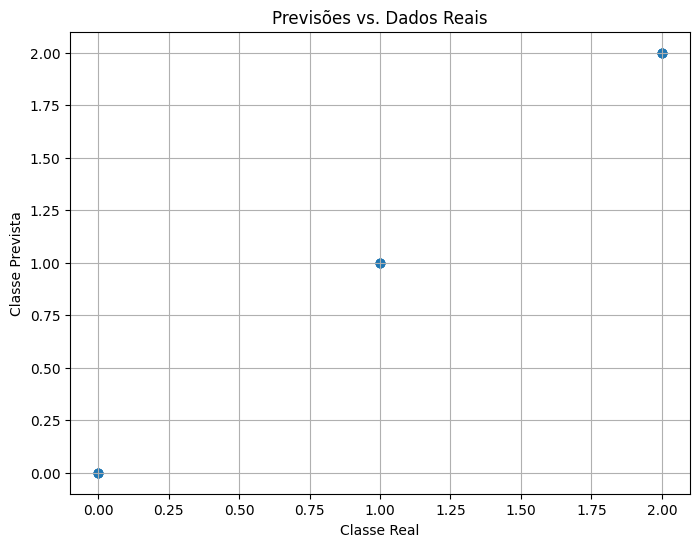

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtem as classes previstas
predicted_classes = np.argmax(predictions, axis=1)

# Cria um gráfico de dispersão com as previsões em relação aos dados reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_classes, alpha=0.5)
plt.xlabel('Classe Real')
plt.ylabel('Classe Prevista')
plt.title('Previsões vs. Dados Reais')
plt.grid(True)
plt.show()


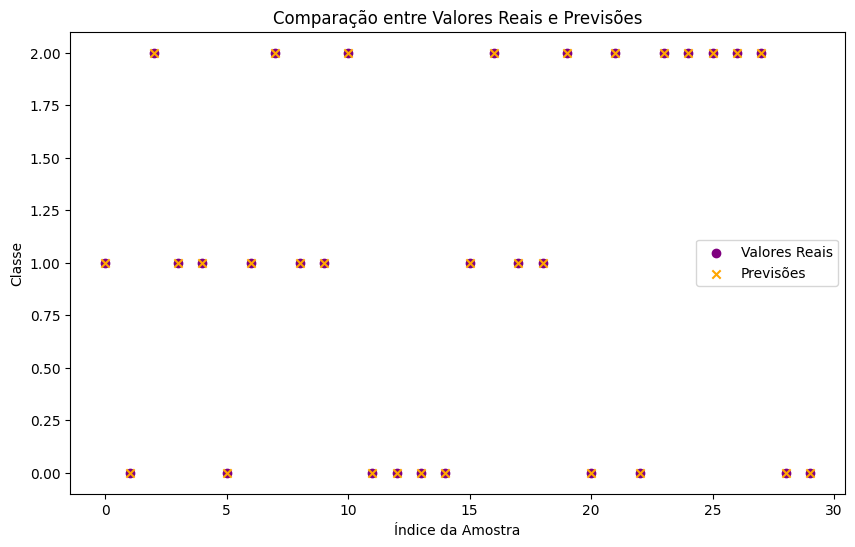

In [ ]:
import matplotlib.pyplot as plt

# Cria uma figura para visualizar as previsões em relação aos dados reais
plt.figure(figsize=(10, 6))

# Plota as previsões e os valores reais
plt.scatter(range(len(y_test)), y_test, color='purple', label='Valores Reais', marker='o')
plt.scatter(range(len(predicted_classes)), predicted_classes, color='orange', label='Previsões', marker='x')

# Configura o gráfico
plt.xlabel('Índice da Amostra')
plt.ylabel('Classe')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend()
plt.show()
